# <h1 align = "center"><b>Tugas 10 Komputasi Statistika II</b></center> </h1>
<div markdown = "1"> <h3 align = "center"><b><em>Supervised Learning :</em> Decision Tree</b></h3> </div>

## **1. 📈 Penjelasan Dataset**
---

[Klasifikasi Obesitas Individu](https://www.kaggle.com/datasets/sujithmandala/obesity-classification-dataset/data), dataset memuat informasi tentang klasifikasi obesitas secara individu. dataset memuat beberapa kolom sebagai berikut:

*   ID : kode indentivikasi untuk individu
*   Age : usia dari individu
*   Gender : jenis kelamin individu
*   Height : tinggi badan individu dalam satuan sentimeter
*   Weight : berat badan individu dalam satuan kilogram
*   BMI : indeks massa tubuh individu, dihitung dengan $\frac{\mathrm{Weight}}{\mathrm{Height}^2}$
*   Label : klasifikasi jenis obesitas dari individu, yaitu Normal Weight, Overweight, Obese, dan Underwight

In [ ]:
#import module
import pandas  as pd
import numpy as np

In [ ]:
# Memperindah Visualisasi
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='Montserrat-Regular.ttf')
font_bold = FontProperties(fname='Montserrat-Bold.ttf')
font_title = FontProperties(fname='Montserrat-Bold.ttf', size=16)
font_italic = FontProperties(fname='Montserrat-Italic.ttf')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read data
df = pd.read_csv('Obesity Classification.csv')

In [ ]:
df

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


In [ ]:
# Encode manual pada kolom gender
df['Gender_encoded'] = df['Gender'].map({'Male':0, 'Female':1})
df

,ID,Age,Gender,Height,Weight,BMI,Label,Gender_encoded
0,1,25,Male,175,80,25.3,Normal Weight,0
1,2,30,Female,160,60,22.5,Normal Weight,1
2,3,35,Male,180,90,27.3,Overweight,0
3,4,40,Female,150,50,20.0,Underweight,1
4,5,45,Male,190,100,31.2,Obese,0
...,...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight,0
104,107,16,Female,160,10,3.9,Underweight,1
105,108,21,Male,180,15,5.6,Underweight,0
106,109,26,Female,150,15,5.6,Underweight,1


In [ ]:
df['Label'].value_counts()

,count
Label,
Underweight,47
Normal Weight,29
Overweight,20
Obese,12


In [ ]:
#encode manual pada kolom label
df['Label_encoded'] = df['Label'].map({'Underweight':0, 'Normal Weight':1, 'Overweight':2, 'Obese':3})
df

,ID,Age,Gender,Height,Weight,BMI,Label,Gender_encoded,Label_encoded
0,1,25,Male,175,80,25.3,Normal Weight,0,1
1,2,30,Female,160,60,22.5,Normal Weight,1,1
2,3,35,Male,180,90,27.3,Overweight,0,2
3,4,40,Female,150,50,20.0,Underweight,1,0
4,5,45,Male,190,100,31.2,Obese,0,3
...,...,...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight,0,0
104,107,16,Female,160,10,3.9,Underweight,1,0
105,108,21,Male,180,15,5.6,Underweight,0,0
106,109,26,Female,150,15,5.6,Underweight,1,0


In [ ]:
x=df.drop(['ID','Label_encoded'],axis=1)
y=df['Label_encoded']
x,y

(     Age  Gender  Height  Weight   BMI          Label  Gender_encoded
 0     25    Male     175      80  25.3  Normal Weight               0
 1     30  Female     160      60  22.5  Normal Weight               1
 2     35    Male     180      90  27.3     Overweight               0
 3     40  Female     150      50  20.0    Underweight               1
 4     45    Male     190     100  31.2          Obese               0
 ..   ...     ...     ...     ...   ...            ...             ...
 103   11    Male     175      10   3.9    Underweight               0
 104   16  Female     160      10   3.9    Underweight               1
 105   21    Male     180      15   5.6    Underweight               0
 106   26  Female     150      15   5.6    Underweight               1
 107   31    Male     190      20   8.3    Underweight               0
 
 [108 rows x 7 columns],
 0      1
 1      1
 2      2
 3      0
 4      3
       ..
 103    0
 104    0
 105    0
 106    0
 107    0
 Name: Labe

## **2. 🚞 Analisis Data Eksploratif**
---

In [ ]:
df.describe(include='object')

,Gender,Label
count,108,108
unique,2,4
top,Male,Underweight
freq,56,47


In [ ]:
import seaborn as sns

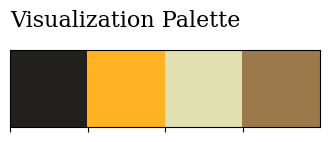

In [ ]:
# Palette
sns.palplot(['#221f1f', '#FFB323', '#E1E0B1', '#9C794A'])

plt.title("Visualization Palette ",loc='left',font='serif',fontsize=16,y=1.2)
plt.show()

### **2.1. Distribusi Age, Height, Weight, BMI**

<Axes: xlabel='BMI', ylabel='Density'>

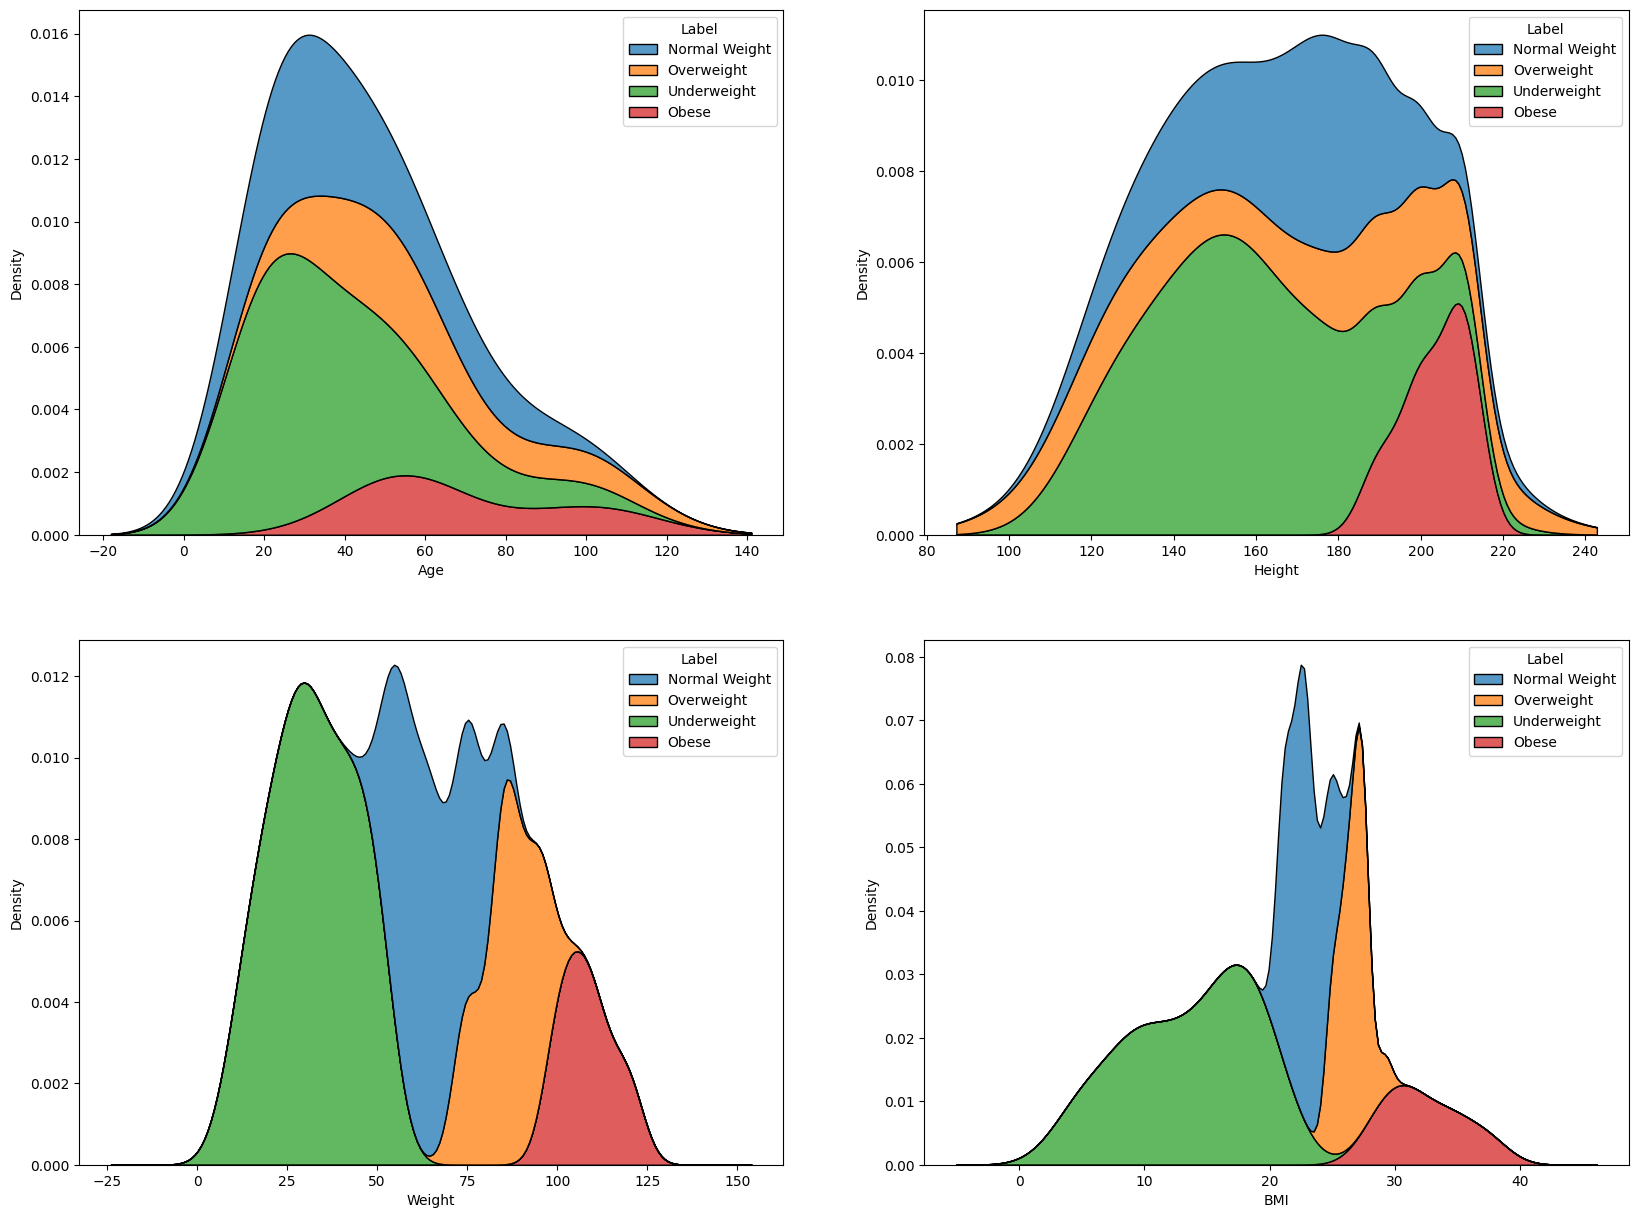

In [ ]:
# make scatter plot
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.kdeplot(data=df, x="Age", hue="Label", multiple="stack")

plt.subplot(2,2,2)
sns.kdeplot(data=df, x="Height", hue="Label", multiple="stack")

plt.subplot(2,2,3)
sns.kdeplot(data=df, x="Weight", hue="Label", multiple="stack")

plt.subplot(2,2,4)
sns.kdeplot(data=df, x="BMI", hue="Label", multiple="stack")

### **2.2. Bar Gender, Label**

#### Label

In [ ]:
df['Label'].unique()

array(['Normal Weight', 'Overweight', 'Underweight', 'Obese'],
      dtype=object)

In [ ]:
# For viz: Ratio of Label types

x=df.groupby(['Label'])['Label'].count()
y=len(df)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T

In [ ]:
mf_ratio

Label,Normal Weight,Obese,Overweight,Underweight
Label,0.27,0.11,0.19,0.44


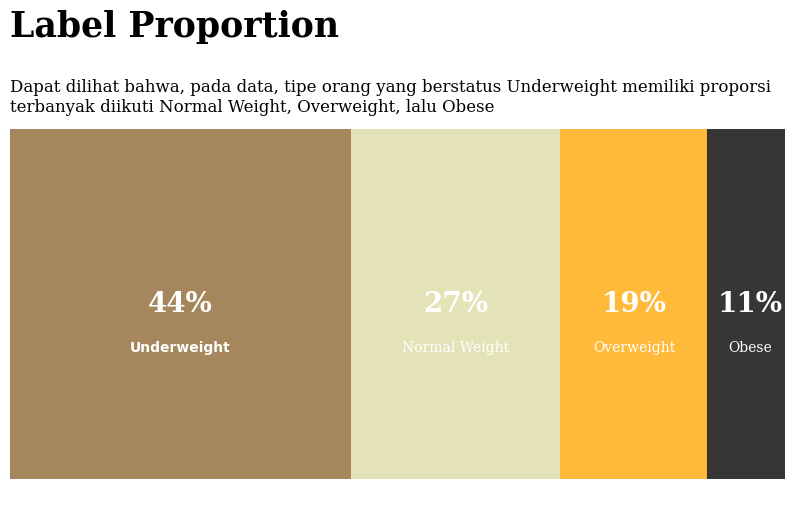

In [25]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))

ax.barh(mf_ratio.index, mf_ratio['Underweight'],
        color='#9C794A', alpha=0.9)
ax.barh(mf_ratio.index, mf_ratio['Normal Weight'], left=mf_ratio['Underweight'],
        color='#E1E0B1', alpha=0.9)
ax.barh(mf_ratio.index, mf_ratio['Overweight'], left=mf_ratio['Underweight'] + mf_ratio['Normal Weight'],
        color= '#FFB323', alpha=0.9)
ax.barh(mf_ratio.index, mf_ratio['Obese'], left=mf_ratio['Underweight'] + mf_ratio['Normal Weight'] + mf_ratio['Overweight'],
        color='#221f1f', alpha=0.9)


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
#ax.set_yticklabels(mf_ratio.index, fontfamily='serif', fontsize=11)


# movie percentage
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Underweight'][i]*100)}%",
                   xy=(mf_ratio['Underweight'][i]/2, i),
                   va = 'center', ha='center',fontsize=20, fontweight='bold', fontfamily='serif',
                   color='white')

    ax.annotate("Underweight",
                   xy=(mf_ratio['Underweight'][i]/2, -0.10),
                   va = 'center', ha='center',fontsize=10, fontweight='bold', fontfamily='light',
                   color='white')


for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Normal Weight'][i]*100)}%",
                   xy=(mf_ratio['Underweight'][i]+mf_ratio['Normal Weight'][i]/2, i),
                   va = 'center', ha='center',fontsize=20, fontweight='bold', fontfamily='serif',
                   color='white')
    ax.annotate("Normal Weight",
                   xy=(mf_ratio['Underweight'][i]+mf_ratio['Normal Weight'][i]/2, -0.10),
                   va = 'center', ha='center',fontsize=10, fontweight='light', fontfamily='serif',
                   color='white')

for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Overweight'][i]*100)}%",
                   xy=(mf_ratio['Underweight'][i]+mf_ratio['Normal Weight']+mf_ratio['Overweight'][i]/2, i),
                   va = 'center', ha='center',fontsize=20, fontweight='bold', fontfamily='serif',
                   color='white')
    ax.annotate("Overweight",
                   xy=(mf_ratio['Underweight'][i]+mf_ratio['Normal Weight']+mf_ratio['Overweight'][i]/2, -0.10),
                   va = 'center', ha='center',fontsize=10, fontweight='light', fontfamily='serif',
                   color='white')

for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Obese'][i]*100)}%",
                   xy=(mf_ratio['Underweight'][i]+mf_ratio['Normal Weight']+mf_ratio['Overweight']+mf_ratio['Obese'][i]/2, i),
                   va = 'center', ha='center',fontsize=20, fontweight='bold', fontfamily='serif',
                   color='white')
    ax.annotate("Obese",
                   xy=(mf_ratio['Underweight'][i]+mf_ratio['Normal Weight']+mf_ratio['Overweight']+mf_ratio['Obese'][i]/2, -0.10),
                   va = 'center', ha='center',fontsize=10, fontweight='light', fontfamily='serif',
                   color='white')






# Title & Subtitle
fig.text(0.125,1.03,'Label Proportion', fontweight='bold', fontfamily='serif',fontsize=25)
fig.text(0.125,0.92,'Dapat dilihat bahwa, pada data, tipe orang yang berstatus Underweight memiliki proporsi',fontweight='light', fontfamily='serif',fontsize=12)
fig.text(0.125,0.88,'terbanyak diikuti Normal Weight, Overweight, lalu Obese',fontfamily='serif',fontweight='light', size=12)

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)



#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

# Removing legend due to labelled plot
ax.legend().set_visible(False)
plt.show()

### **2.3. Gender**

In [ ]:
# For viz: Ratio of Gender

x=df.groupby(['Gender'])['Gender'].count()
y=len(df)
r=((x/y)).round(2)

gen_ratio = pd.DataFrame(r).T

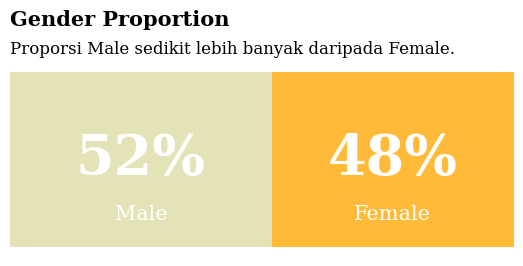

In [26]:
fig, ax = plt.subplots(1,1,figsize=(6.5, 2.5))

ax.barh(gen_ratio.index, gen_ratio['Male'],
        color='#E1E0B1', alpha=0.9, label='Male')
ax.barh(gen_ratio.index, gen_ratio['Female'], left=gen_ratio['Male'],
        color='#FFB323', alpha=0.9, label='Female')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
#ax.set_yticklabels(gen_ratio.index, fontfamily='serif', fontsize=11)


# Male percentage
for i in gen_ratio.index:
    ax.annotate(f"{int(gen_ratio['Male'][i]*100)}%",
                   xy=(gen_ratio['Male'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='bold', fontfamily='serif',
                   color='white')

    ax.annotate("Male",
                   xy=(gen_ratio['Male'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')


for i in gen_ratio.index:
    ax.annotate(f"{int(gen_ratio['Female'][i]*100)}%",
                   xy=(gen_ratio['Male'][i]+gen_ratio['Female'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='bold', fontfamily='serif',
                   color='white')
    ax.annotate("Female",
                   xy=(gen_ratio['Male'][i]+gen_ratio['Female'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')






# Title & Subtitle
fig.text(0.125,1.03,'Gender Proportion', fontweight='bold', fontfamily='serif',fontsize=15)
fig.text(0.125,0.92,'Proporsi Male sedikit lebih banyak daripada Female.',fontweight='light', fontfamily='serif',fontsize=12)

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)



#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

# Removing legend due to labelled plot
ax.legend().set_visible(False)
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

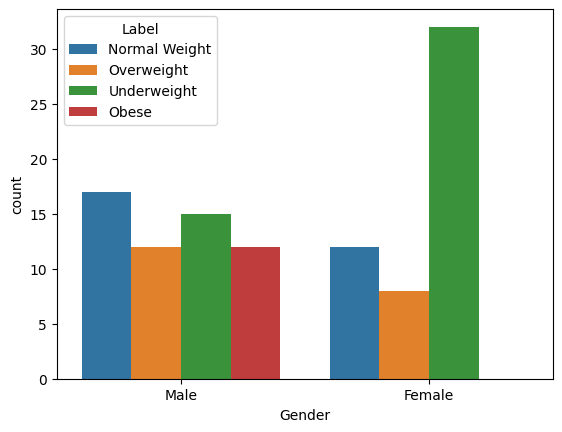

In [ ]:
sns.countplot(df, x = "Gender", hue = 'Label')

### **2.4. Heatmap**

In [ ]:
df.drop('Gender', inplace=True, axis=1)
df.drop('Label', inplace=True, axis=1)

<Axes: >

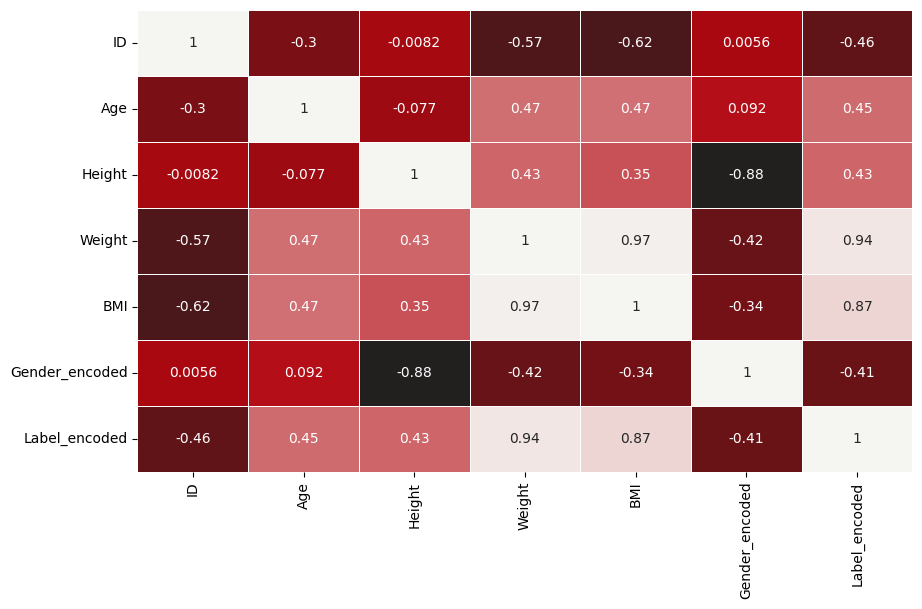

In [ ]:
# Labels
from sklearn.preprocessing import MultiLabelBinarizer

import matplotlib.colors


# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])

# make heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap=cmap, cbar=False, linewidth=0.5)


## **3. Metode *Decision Tree* dalam Klasifikasi**
---

### **3.1. Pendahuluan**

*Decision tree* atau pohon keputusan merupakan suatu alat bantu keputusan dengan model hierarki yang menggunakan model seperti pohon. *Decision tree induction* merupakan proses pembelajaran mesin dari data latih terlabel. Suatu *decision tree* memiliki struktur seperti bagan alir dengan *internal node* menotasikan atribut, tiap cabang menotasikan keluaran dari atribut, dan setiap *leaf node* memegang nilai label kelas. *Node* paling atas disebut sebagai *root node*. *Decision tree* juga dapat digunakan untuk regresi, tetapi pada tugas ini akan dibahas hanya untuk klasifikasi.

![image.png](attachment:image.png)

### **3.2. Cara Kerja *Decision Tree***

*Decision tree* bekerja dengan melibatkan tiga proses berikut.
1. Pemilihan atribut terbaik, yaitu dipilihnya atribut terbaik untuk melakukan percabangan atau *splitting* pada *decision tree*;
2. Pemisahan kumpulan data, yaitu dikumpulkannya data menjadi beberapa subhimpunan berdasarkan atribut yang dipilih; dan
3. Pengulangan proses, yaitu proses dalam pembuatan *decision tree* diulangi secara rekursif hingga kriteria penghentian terpenuhi.

![image.png](attachment:image.png)

### **3.3. Information Theory**

Salah satu hal yang perlu ditentukan dalam pembuatan *decision tree* adalah **pemilihan atribut** ketika melakukan percabangan. Pemilihan atribut ini sering dikenal sebagai *splitting rules*. Atribut yang dipilih untuk percabangan adalah atribut yang memberikan pemisahan kelas terbaik. Dalam melakukan optimisasi pemilihan atribut yang digunakan untuk percabangan, digunakan beberapa ukuran dari teori informasi, seperti *information gain*, *gain ratio*, dan *gini index*. Metrik-metrik tersebut dapat digunakan untuk melakukan pemisahan atau percabangan pada *decision tree*.

**Notasi**
___

Misalkan $D$ merupakan partisi data, yaitu himpunan data latih berlabel. Misalkan pula atribut label kelas memiliki $m$ nilai yang berbeda (melambangkan $m$ kelas yang berbeda), yaitu $C_i$ (untuk $i = 1, 2, \dots, m$).

Misalkan $C_{i,D}$ merupakan data-data dengan kelas $C_i$ pada dataset $D$. Misalkan pula $\mid D \mid$ dan $\mid C_{i,D}\mid$ merupakan banyaknya data di $D$ dan $C_{i,D}$ secara berurutan.

#### **3.2.1. Information Gain**

*Information gain* memberikan gambaran terkait keacakan atau ketidakmurnian (*impurity*) pada partisi yang akan dibuat. $\mathrm{Info}(D)$ menghitung rata-rata informasi yang dibutuhkan untuk mengidentifikasi label kelas dalam data $D$, sering kali disebut dengan entropi dari $D$. *Information* dirumuskan dengan
$$\mathrm{Info}(D)=-\sum\limits_{m} p_i\log_2(p_i)$$

dengan $m$ adalah banyaknya kelas yang akan diprediksi, $p_i$ adalah peluang tak nol suatu data di $D$ merupakan bagian dari kelas $C_i$ dan diestimasi dengan $|C_{i,D}| / | D |$.

Banyaknya informasi yang masih dibutuhkan setelah mempartisi data dengan atribut $A$ untuk mendapatkan kelas yang eksak diukur dengan $$\mathrm{Info}_A(D) = \sum\limits_{j = 1}^v \dfrac{|D_j|}{|D|} \times \mathrm{Info}(D_j).$$

Atribut yang dipilih adalah atribut yang memberikan informasi paling sedikit atau memberikan *information gain* paling tinggi.

*Information gain* didefinisikan sebagai selisih antara informasi asli (berdasarkan hanya proporsi kelas-kelas) dengan kondisi yang baru (setelah melakukan *spllitting* dengan atribut $A$), dirumuskan dengan
$$\mathrm{Gain}(A) = \mathrm{Info}(D) - \mathrm{Info}_A(D).$$
Dengan kata lain, $\mathrm{Gain}(A)$ memberikan gambaran terkait seberapa besar informasi yang akan ditambahkan apabila dilakukan *splitting* pada atribut $A$.

#### **3.2.2. Gini Index**

*Gini index* dirumuskan dengan $$\mathrm{Gini}(D) = 1 - \sum\limits_{i = 1}^m p_i^2,$$
dengan $p_i$ merupakan peluang data $D$ memiliki kelas $C_i$ dan diestimasikan dengan $|C_{i,D}|/|D|$.

Nilai maksimum dari *gini index* adalah $1 - 1/n_c$, yaitu ketika data-data terdistribusi secara merata untuk setiap kelas dan nilai minimumnya adalah 0,0, yaitu ketika semua data terdistribusi hanya pada satu kelas.

Apabila dilakukan *splitting* pada $A$ yang membagi $D$ menjadi $D_1$ dan $D_2$ (pada percabangan biner), *gini index* dari $D$ adalah $$\mathrm{Gini}_A(D) = \dfrac{|D_1|}{|D|}\mathrm{Gini}(D_1) + \dfrac{|D_2|}{|D|}\mathrm{Gini}(D_2).$$
Lebih lanjut, *reduction in impurity* atau *gini impurity* adalah
$$\Delta\mathrm{Gini}(A) = \mathrm{Gini}(D) - \mathrm{Gini}_A(D).$$
Serupa dengan *information gain*, atribut yang dipilih ketika melakukan *splitting* adalah atribut yang memberikan *gini impurity* tertinggi.

### **3.4. Aplikasi pada Studi Kasus**
---

**Penyesuaian Skala dengen Standardisasi menggunakan Standard Scaler**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.4, random_state=49)

In [ ]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((64, 5), (44, 5), (64,), (44,))

In [ ]:
train_y, test_y

(98    0
 14    2
 74    1
 30    1
 95    0
      ..
 12    1
 54    2
 40    1
 45    2
 42    2
 Name: Label_encoded, Length: 64, dtype: int64,
 71     0
 88     0
 90     0
 1      1
 43     1
 41     1
 84     0
 83     0
 28     3
 47     2
 23     0
 24     3
 19     0
 51     1
 21     1
 56     3
 99     0
 53     1
 0      1
 17     0
 87     0
 80     0
 64     2
 81     0
 77     1
 25     0
 35     2
 86     0
 29     1
 85     0
 22     2
 65     1
 13     1
 107    0
 11     0
 44     2
 89     0
 97     0
 94     0
 67     2
 100    0
 46     3
 48     1
 38     1
 Name: Label_encoded, dtype: int64)

In [ ]:
train_x

,Age,Height,Weight,BMI,Gender_encoded
98,37,140,25,10.0,1
14,38,190,90,27.3,0
74,45,200,75,24.2,0
30,24,160,55,21.2,1
95,22,180,20,8.3,0
...,...,...,...,...,...
12,28,180,80,25.3,0
54,97,200,95,27.0,0
40,27,180,75,24.2,0
45,52,130,75,25.0,1


In [ ]:
test_x

,Age,Height,Weight,BMI,Gender_encoded
71,30,150,40,16.7,1
88,38,140,35,16.7,1
90,48,130,40,16.7,1
1,30,160,60,22.5,1
43,42,140,65,22.7,1
41,32,150,55,21.2,1
84,18,160,20,8.3,1
83,13,175,25,10.0,0
28,108,210,120,37.2,0
47,62,120,85,27.5,1


# Feature Slesction

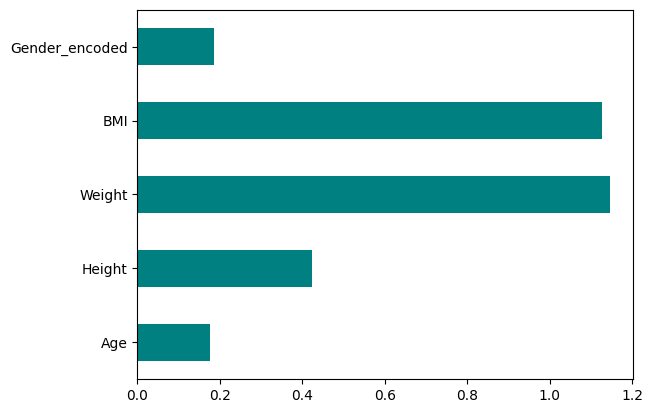

In [ ]:
from sklearn.feature_selection import mutual_info_classif

importance = mutual_info_classif(train_x, train_y)
feat_imporatance = pd.Series(importance, train_x.columns[0:len(train_x)-1])
feat_imporatance.plot(kind = 'barh', color = 'teal')
plt.show()

## Chi-Square

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
chi2_features = SelectKBest(chi2, k=3)
X_kbest_features = chi2_features.fit_transform(train_x, train_y)

In [ ]:
X_kbest_features

array([[ 37. ,  25. ,  10. ],
       [ 38. ,  90. ,  27.3],
       [ 45. ,  75. ,  24.2],
       [ 24. ,  55. ,  21.2],
       [ 22. ,  20. ,   8.3],
       [ 49. , 105. ,  28.9],
       [ 16. ,  10. ,   3.9],
       [ 77. ,  75. ,  24.2],
       [ 60. ,  30. ,  13.3],
       [ 50. ,  60. ,  22.5],
       [ 40. ,  50. ,  20. ],
       [ 52. ,  35. ,  16.7],
       [ 64. ,  95. ,  29.1],
       [ 65. , 120. ,  37.2],
       [103. ,  30. ,  13.3],
       [ 56. ,  95. ,  27. ],
       [ 14. ,  35. ,  16.7],
       [112. ,  85. ,  27.5],
       [ 39. ,  95. ,  27. ],
       [ 35. ,  90. ,  27.3],
       [ 48. , 100. ,  31.2],
       [ 70. ,  20. ,  10. ],
       [102. ,  75. ,  25. ],
       [ 18. ,  70. ,  23.4],
       [ 87. ,  85. ,  26.1],
       [ 41. ,  55. ,  21.2],
       [ 26. ,  15. ,   5.6],
       [ 68. ,  80. ,  25.3],
       [ 12. ,  15. ,   5.6],
       [ 53. ,  55. ,  21.2],
       [ 22. ,  45. ,  18.7],
       [ 57. ,  25. ,  10. ],
       [ 29. ,  85. ,  26.1],
       [ 1

In [ ]:
print('Original feature number:', train_x.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 5
Reduced feature number: 3


## Fisher score

In [ ]:
!pip install skfeature-chappers

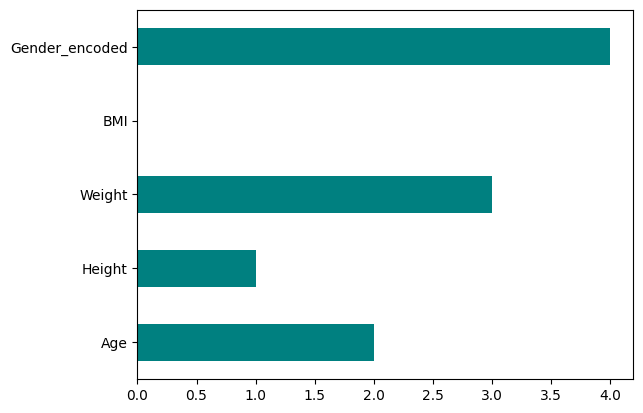

In [ ]:
from skfeature.function.similarity_based import fisher_score

ranks = fisher_score.fisher_score(train_x.values, train_y.values)
feat_importances = pd.Series(ranks, train_x.columns[0:5])
feat_importances.plot(kind='barh', color='teal')
plt.show()

In [ ]:
mean_abs_diff = np.sum(np.abs(train_x - np.mean(train_x, axis=0)), axis=0) / train_x.shape[0]

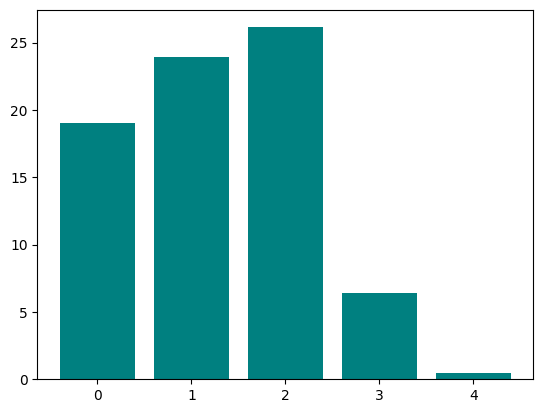

In [ ]:
plt.bar(np.arange(train_x.shape[1]), mean_abs_diff, color='teal')
plt.show()

## Variance Threshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold

v_treshold = VarianceThreshold(threshold=0)
v_treshold.fit(train_x)
v_treshold.get_support()

array([ True,  True,  True,  True,  True])

## Best Subset

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector

In [ ]:
# Membuat objek SequentialFeatureSelector untuk Forward Feature Selection
sfs = SFS(DecisionTreeClassifier(),
          k_features=3,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5)

# Melatih SFS pada data pelatihan
sfs = sfs.fit(train_x, train_y)

# Mendapatkan fitur yang dipilih
selected_features = sfs.k_feature_idx_
print(f"Selected features: {selected_features}")

Selected features: (2, 3, 4)


In [ ]:
efs = ExhaustiveFeatureSelector(DecisionTreeClassifier(),
                                min_features=1,
                                max_features=5,
                                scoring='roc_auc',
                                cv=2)

In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Library for Model Accuracy Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
param_dt = {
    'criterion': ['gini', 'entropy'], # entropy = information gain
    'max_depth': [10, 20, 30, 40, 50], # kedalaman pohon
    'min_samples_split': [2, 5, 10] # jumlah minimum sampel yang diperlukan untuk membagi node
}
dt = DecisionTreeClassifier(random_state=49) # ini untuk menginisialisasi model

grid_dt = GridSearchCV(dt, param_grid=param_dt, cv=5, n_jobs=-1, verbose=1)
# n_jobs itu -1 itu untuk mempercepat komputasi
# cv=5 berarti digunakan validasi silang dengan 5 lipatan
# verbose=1 berarti akan menampilkan proses training

grid_dt.fit(train_x, train_y)
grid_dt.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}

In [ ]:
# Decision Tree Model
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_split = 2, random_state=49)

decision_tree.fit(train_x, train_y)
y_pred_dt = decision_tree.predict(test_x)

In [ ]:
# Decision Tree Model
print('Accuracy: ', accuracy_score(test_y, y_pred_dt))
print('Confusion Matrix: \n', confusion_matrix(test_y, y_pred_dt))
print('Classification Report: \n', classification_report(test_y, y_pred_dt))

Accuracy:  1.0
Confusion Matrix: 
 [[21  0  0  0]
 [ 0 13  0  0]
 [ 0  0  6  0]
 [ 0  0  0  4]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         4

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44



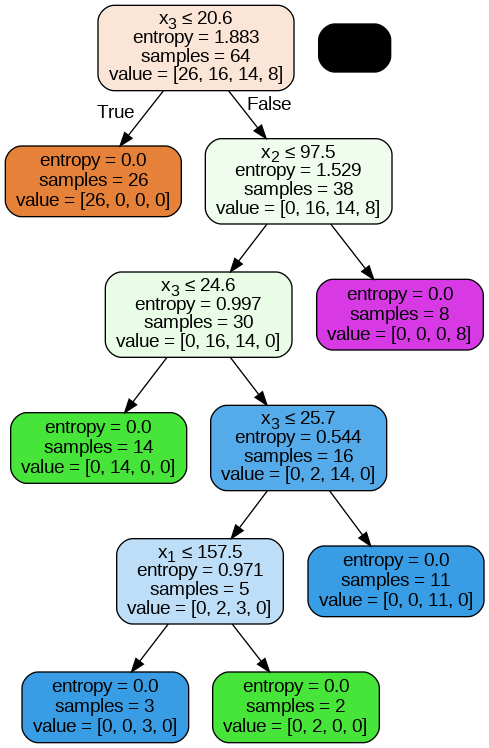

In [ ]:
from six import StringIO
#from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

**Eksplorasi: Analisis tanpa Variabel Gender**

In [ ]:
df

,ID,Age,Height,Weight,BMI,Gender_encoded,Label_encoded
0,1,25,175,80,25.3,0,1
1,2,30,160,60,22.5,1,1
2,3,35,180,90,27.3,0,2
3,4,40,150,50,20.0,1,0
4,5,45,190,100,31.2,0,3
...,...,...,...,...,...,...,...
103,106,11,175,10,3.9,0,0
104,107,16,160,10,3.9,1,0
105,108,21,180,15,5.6,0,0
106,109,26,150,15,5.6,1,0


In [ ]:
# drop gender
x1 = df.drop(columns = ['ID', 'Label_encoded', 'Gender_encoded'])
y1 = df['Label_encoded']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_x, test_x, train_y, test_y = train_test_split(x1, y1, test_size=0.4, random_state=49)

In [ ]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((64, 4), (44, 4), (64,), (44,))

In [ ]:
train_y, test_y

(98    0
 14    2
 74    1
 30    1
 95    0
      ..
 12    1
 54    2
 40    1
 45    2
 42    2
 Name: Label_encoded, Length: 64, dtype: int64,
 71     0
 88     0
 90     0
 1      1
 43     1
 41     1
 84     0
 83     0
 28     3
 47     2
 23     0
 24     3
 19     0
 51     1
 21     1
 56     3
 99     0
 53     1
 0      1
 17     0
 87     0
 80     0
 64     2
 81     0
 77     1
 25     0
 35     2
 86     0
 29     1
 85     0
 22     2
 65     1
 13     1
 107    0
 11     0
 44     2
 89     0
 97     0
 94     0
 67     2
 100    0
 46     3
 48     1
 38     1
 Name: Label_encoded, dtype: int64)

In [ ]:
num=['Age','Height','Weight','BMI']

#standardisasi kolom 'Age' pada data train_x dan y_train
scaler = StandardScaler()

scaler.fit(train_x[num])

train_x[num] = scaler.transform(train_x[num])
test_x[num]=scaler.transform(test_x[num])

In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Library for Model Accuracy Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
param_dt = {
    'criterion': ['gini', 'entropy'], # entropy = information gain
    'max_depth': [10, 20, 30, 40, 50], # kedalaman pohon
    'min_samples_split': [2, 5, 10] # jumlah minimum sampel yang diperlukan untuk membagi node
}
dt = DecisionTreeClassifier(random_state=49) # ini untuk menginisialisasi model

grid_dt = GridSearchCV(dt, param_grid=param_dt, cv=5, n_jobs=-1, verbose=1)
# n_jobs itu -1 itu untuk mempercepat komputasi
# cv=5 berarti digunakan validasi silang dengan 5 lipatan
# verbose=1 berarti akan menampilkan proses training

grid_dt.fit(train_x, train_y)
grid_dt.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}

In [ ]:
# Decision Tree Model
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_split = 2, random_state=49)

decision_tree.fit(train_x, train_y)
y_pred_dt = decision_tree.predict(test_x)

In [ ]:
# Decision Tree Model
print('Accuracy: ', accuracy_score(test_y, y_pred_dt))
print('Confusion Matrix: \n', confusion_matrix(test_y, y_pred_dt))
print('Classification Report: \n', classification_report(test_y, y_pred_dt))

Accuracy:  1.0
Confusion Matrix: 
 [[21  0  0  0]
 [ 0 13  0  0]
 [ 0  0  6  0]
 [ 0  0  0  4]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         4

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44

